In [21]:
%load_ext autoreload
%autoreload 2
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
%matplotlib inline
from ovejero import model_trainer, data_tools, bnn_inference

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Testing the Performance of Trained Models

__Author:__ Sebastian Wagner-Carena

__Created:__ 11/15/2019

__Last Run:__ 11/15/2019

__Goals:__ Inspect how the different bnn types and data augmentation strategies change the performance

## Diagonal Posterior - Normalizing Inputs

In [22]:
# First specify the config path
root_path = '/Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/'
config_path = root_path + 'configs/nn1.json'

# Check that the config has what you need
cfg = model_trainer.load_config(config_path)

def recursive_str_checker(cfg_dict):
    for key in cfg_dict:
        if isinstance(cfg_dict[key],str):
            cfg_dict[key] = cfg_dict[key].replace('/home/swagnercarena/ovejero/',root_path)
        if isinstance(cfg_dict[key],dict):
            recursive_str_checker(cfg_dict[key])
recursive_str_checker(cfg)

# The InferenceClass will do all the heavy lifting of preparing the model from the configuration file,
# initializing the validation dataset, and providing outputs correctly marginalized over the BNN uncertainties.
bnn_infer = bnn_inference.InferenceClass(cfg)

# Now we just have to ask the InferenceClass to spin up some samples from our BNN. The more samples, the more
# accurate our plots and metrics will be. The right value to use unfortunately requires a bit of trial and error.
# 100 is a good starting point though.
num_samples = 1000
save_path_nn1 = root_path + 'validation_results/nn1_samps/'
bnn_infer.gen_samples(num_samples,save_path_nn1)

Is model built: True
Loaded weights /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/models/nn1.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/validation_results/nn1_samps/


In [23]:
bnn_infer.report_stats()

Parameter, RMSE, Median Abs Error, Median Std
external_shear_g1 0.038329813914933314 0.011072166164541826 0.02921505862475724
external_shear_g2 0.026891963412273786 0.011240249682152152 0.03018597818282486
lens_mass_center_x 0.016873105344969663 0.007713915831607944 0.02791451746450054
lens_mass_center_y 0.02074487887555847 0.007488672953272789 0.028641175035619852
lens_mass_e1 0.0490027799881463 0.021260637456923415 0.05907101815556079
lens_mass_e2 0.043432555454594055 0.01921532831893431 0.05844793925904828
lens_mass_gamma 0.06985130293786387 0.03818242082664036 0.0672079139193247
lens_mass_theta_E_log 0.02159047974564677 0.007677585225264388 0.027285750890655137


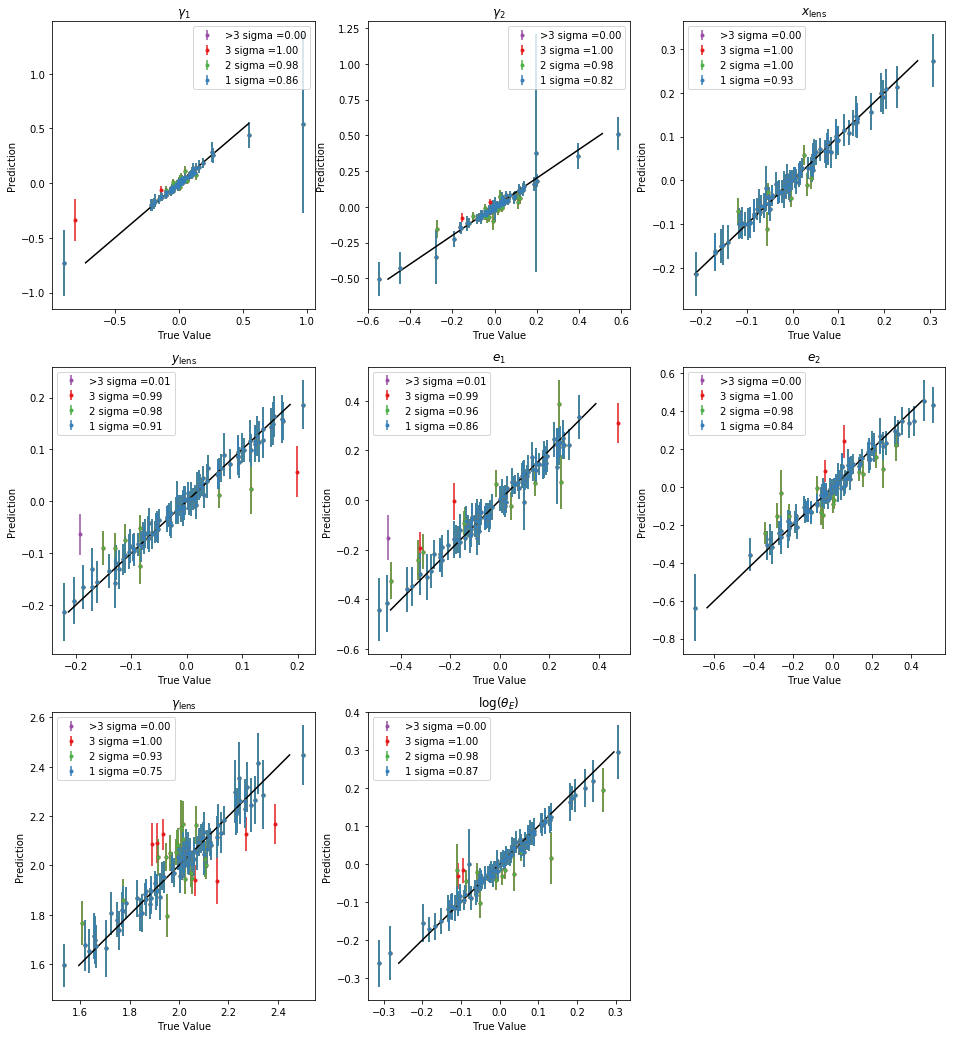

In [24]:
num_lenses = 100
bnn_infer.gen_coverage_plots(num_lenses=num_lenses)

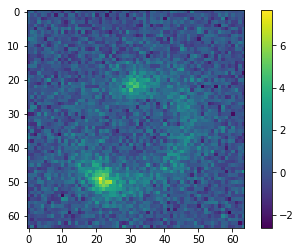

external_shear_g1 -0.006643894
external_shear_g2 -0.08262181
lens_mass_center_x 0.044340156
lens_mass_center_y 0.058678288
lens_mass_e1 -0.116788246
lens_mass_e2 0.04036823
lens_mass_gamma 2.16908
lens_mass_theta_E_log 0.18285306


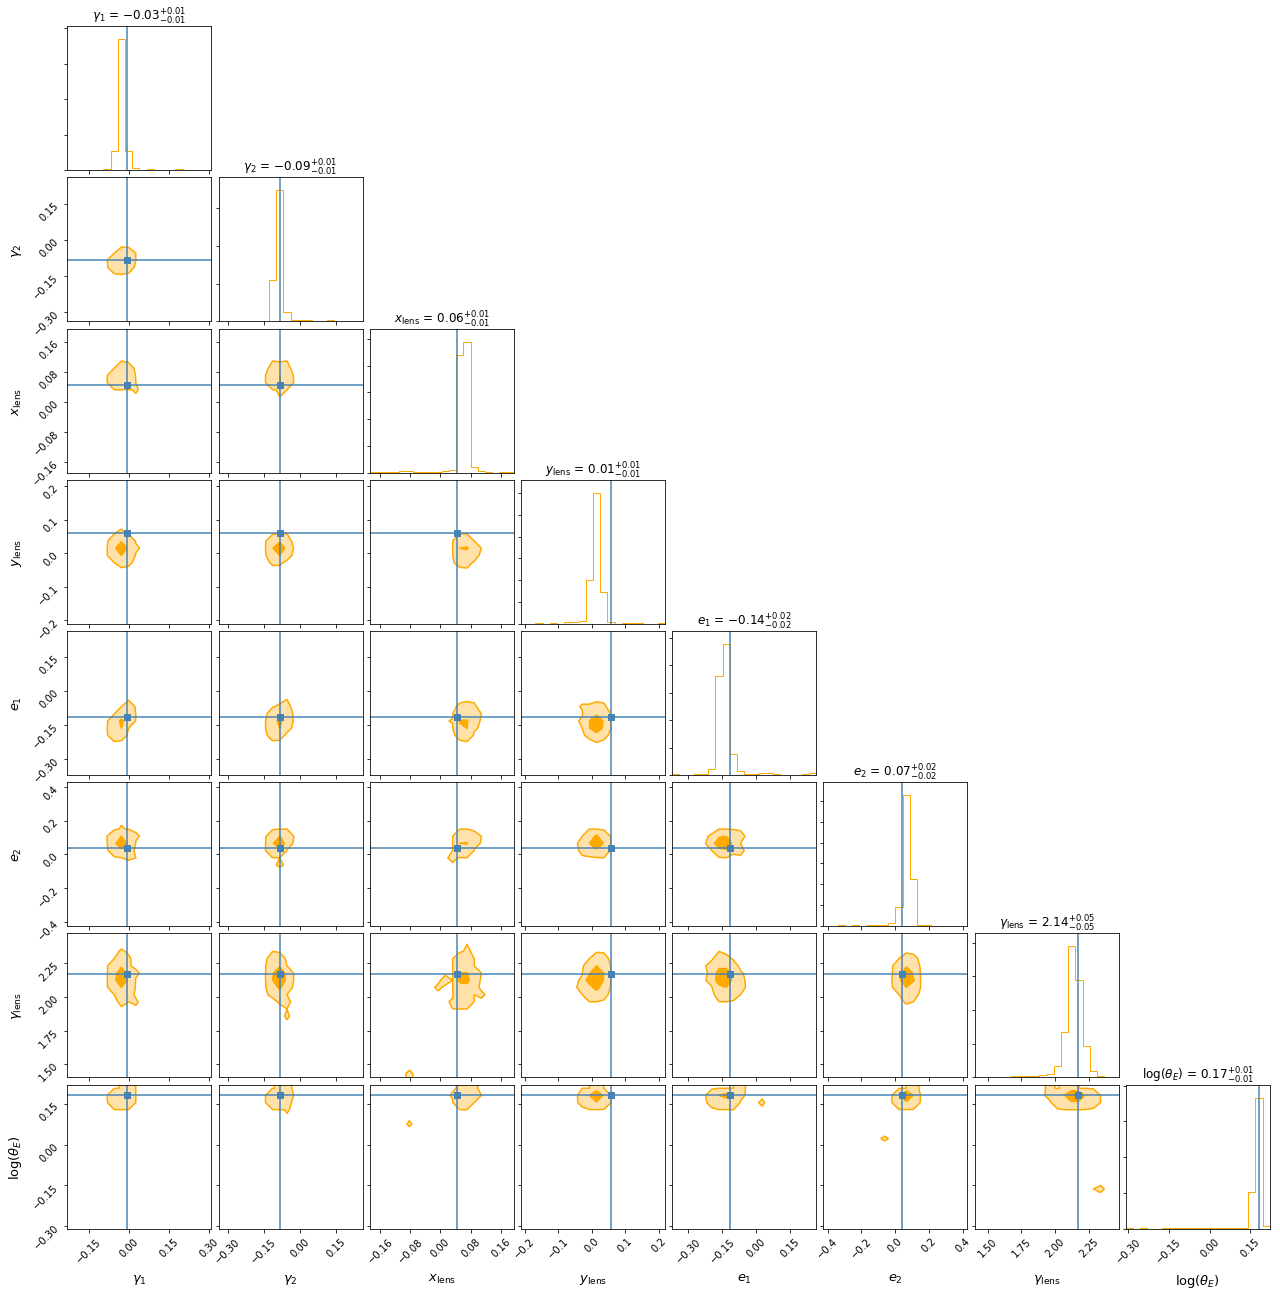

In [25]:
image_index = 8
bnn_infer.plot_posterior_contours(image_index)

0.12139962385178593 1.2803807190741807


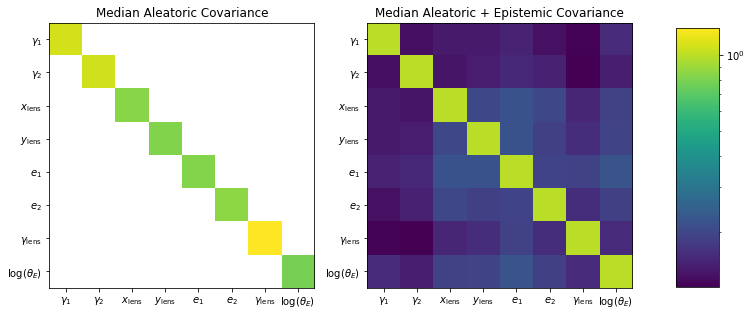

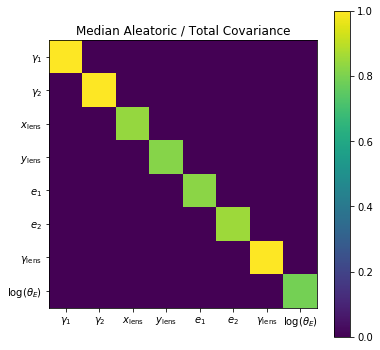

In [26]:
bnn_infer.comp_al_ep_unc()

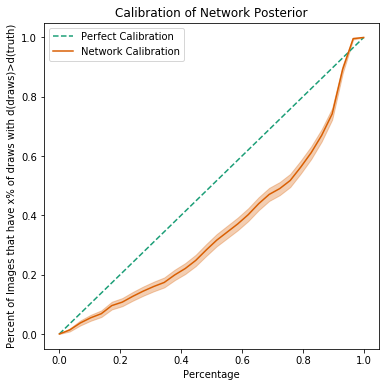

In [27]:
color_map = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e']
n_perc_points = 30
fig = bnn_infer.plot_calibration(color_map=color_map,n_perc_points=n_perc_points,show_plot=False)

## Diagonal Low Regularizer

In [30]:
config_path = root_path + 'configs/nn1_lr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
save_path_nn1_lr = root_path + 'validation_results/nn1_lr_samps/'
bnn_infer.gen_samples(num_samples,save_path_nn1_lr)

Is model built: True
No weights found. Saving new weights to /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/models/nn1_lr.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/validation_results/nn1_lr_samps/


In [31]:
bnn_infer.report_stats()

Parameter, RMSE, Median Abs Error, Median Std
external_shear_g1 0.026242039178347484 0.01116461502914762 0.02344262250001023
external_shear_g2 0.02162499471828665 0.011118097044535171 0.025246992190468425
lens_mass_center_x 0.014575578012015056 0.007567512542192942 0.026572317688340688
lens_mass_center_y 0.020859734814118812 0.006028564617245827 0.026505935113086552
lens_mass_e1 0.048569644959225215 0.02263970909075115 0.06138841436199677
lens_mass_e2 0.0353631937973226 0.018857080563280115 0.05320086047277306
lens_mass_gamma 0.07082296501428056 0.03900557050023257 0.06327394615928492
lens_mass_theta_E_log 0.02233933662163008 0.007589013867200534 0.025567066597173012


## Diagonal High Regularizer

In [32]:
config_path = root_path + 'configs/nn1_hr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
save_path_nn1_hr = root_path + 'validation_results/nn1_hr_samps/'
bnn_infer.gen_samples(num_samples,save_path_nn1_hr)

Is model built: True
No weights found. Saving new weights to /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/models/nn1_hr.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/validation_results/nn1_hr_samps/


In [33]:
bnn_infer.report_stats()

Parameter, RMSE, Median Abs Error, Median Std
external_shear_g1 0.03470580797472214 0.009684994763854893 0.02611650887766131
external_shear_g2 0.03155321956813024 0.011396296797225494 0.027907980099890775
lens_mass_center_x 0.017631816204105113 0.007632193992458493 0.029214664169182496
lens_mass_center_y 0.017642461299282618 0.007898382169201256 0.03008077419498872
lens_mass_e1 0.044141360636188065 0.018131538489252964 0.062024577004235804
lens_mass_e2 0.044530889135342464 0.018776947989149934 0.059296183986734925
lens_mass_gamma 0.06337498473529625 0.03566490004995271 0.06489468880589411
lens_mass_theta_E_log 0.01953835723907475 0.00680201219910774 0.027459502183950785


## Comparison of Diagonals

Is model built: True
No weights found. Saving new weights to /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/models/nn1_lr.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/validation_results/nn1_lr_samps/
Is model built: True
Loaded weights /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/models/nn1.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/validation_results/nn1_samps/
Is model built: True
No weights found. Saving new weights to /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/models/nn1_hr.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/validation_results/nn1_hr_samps/


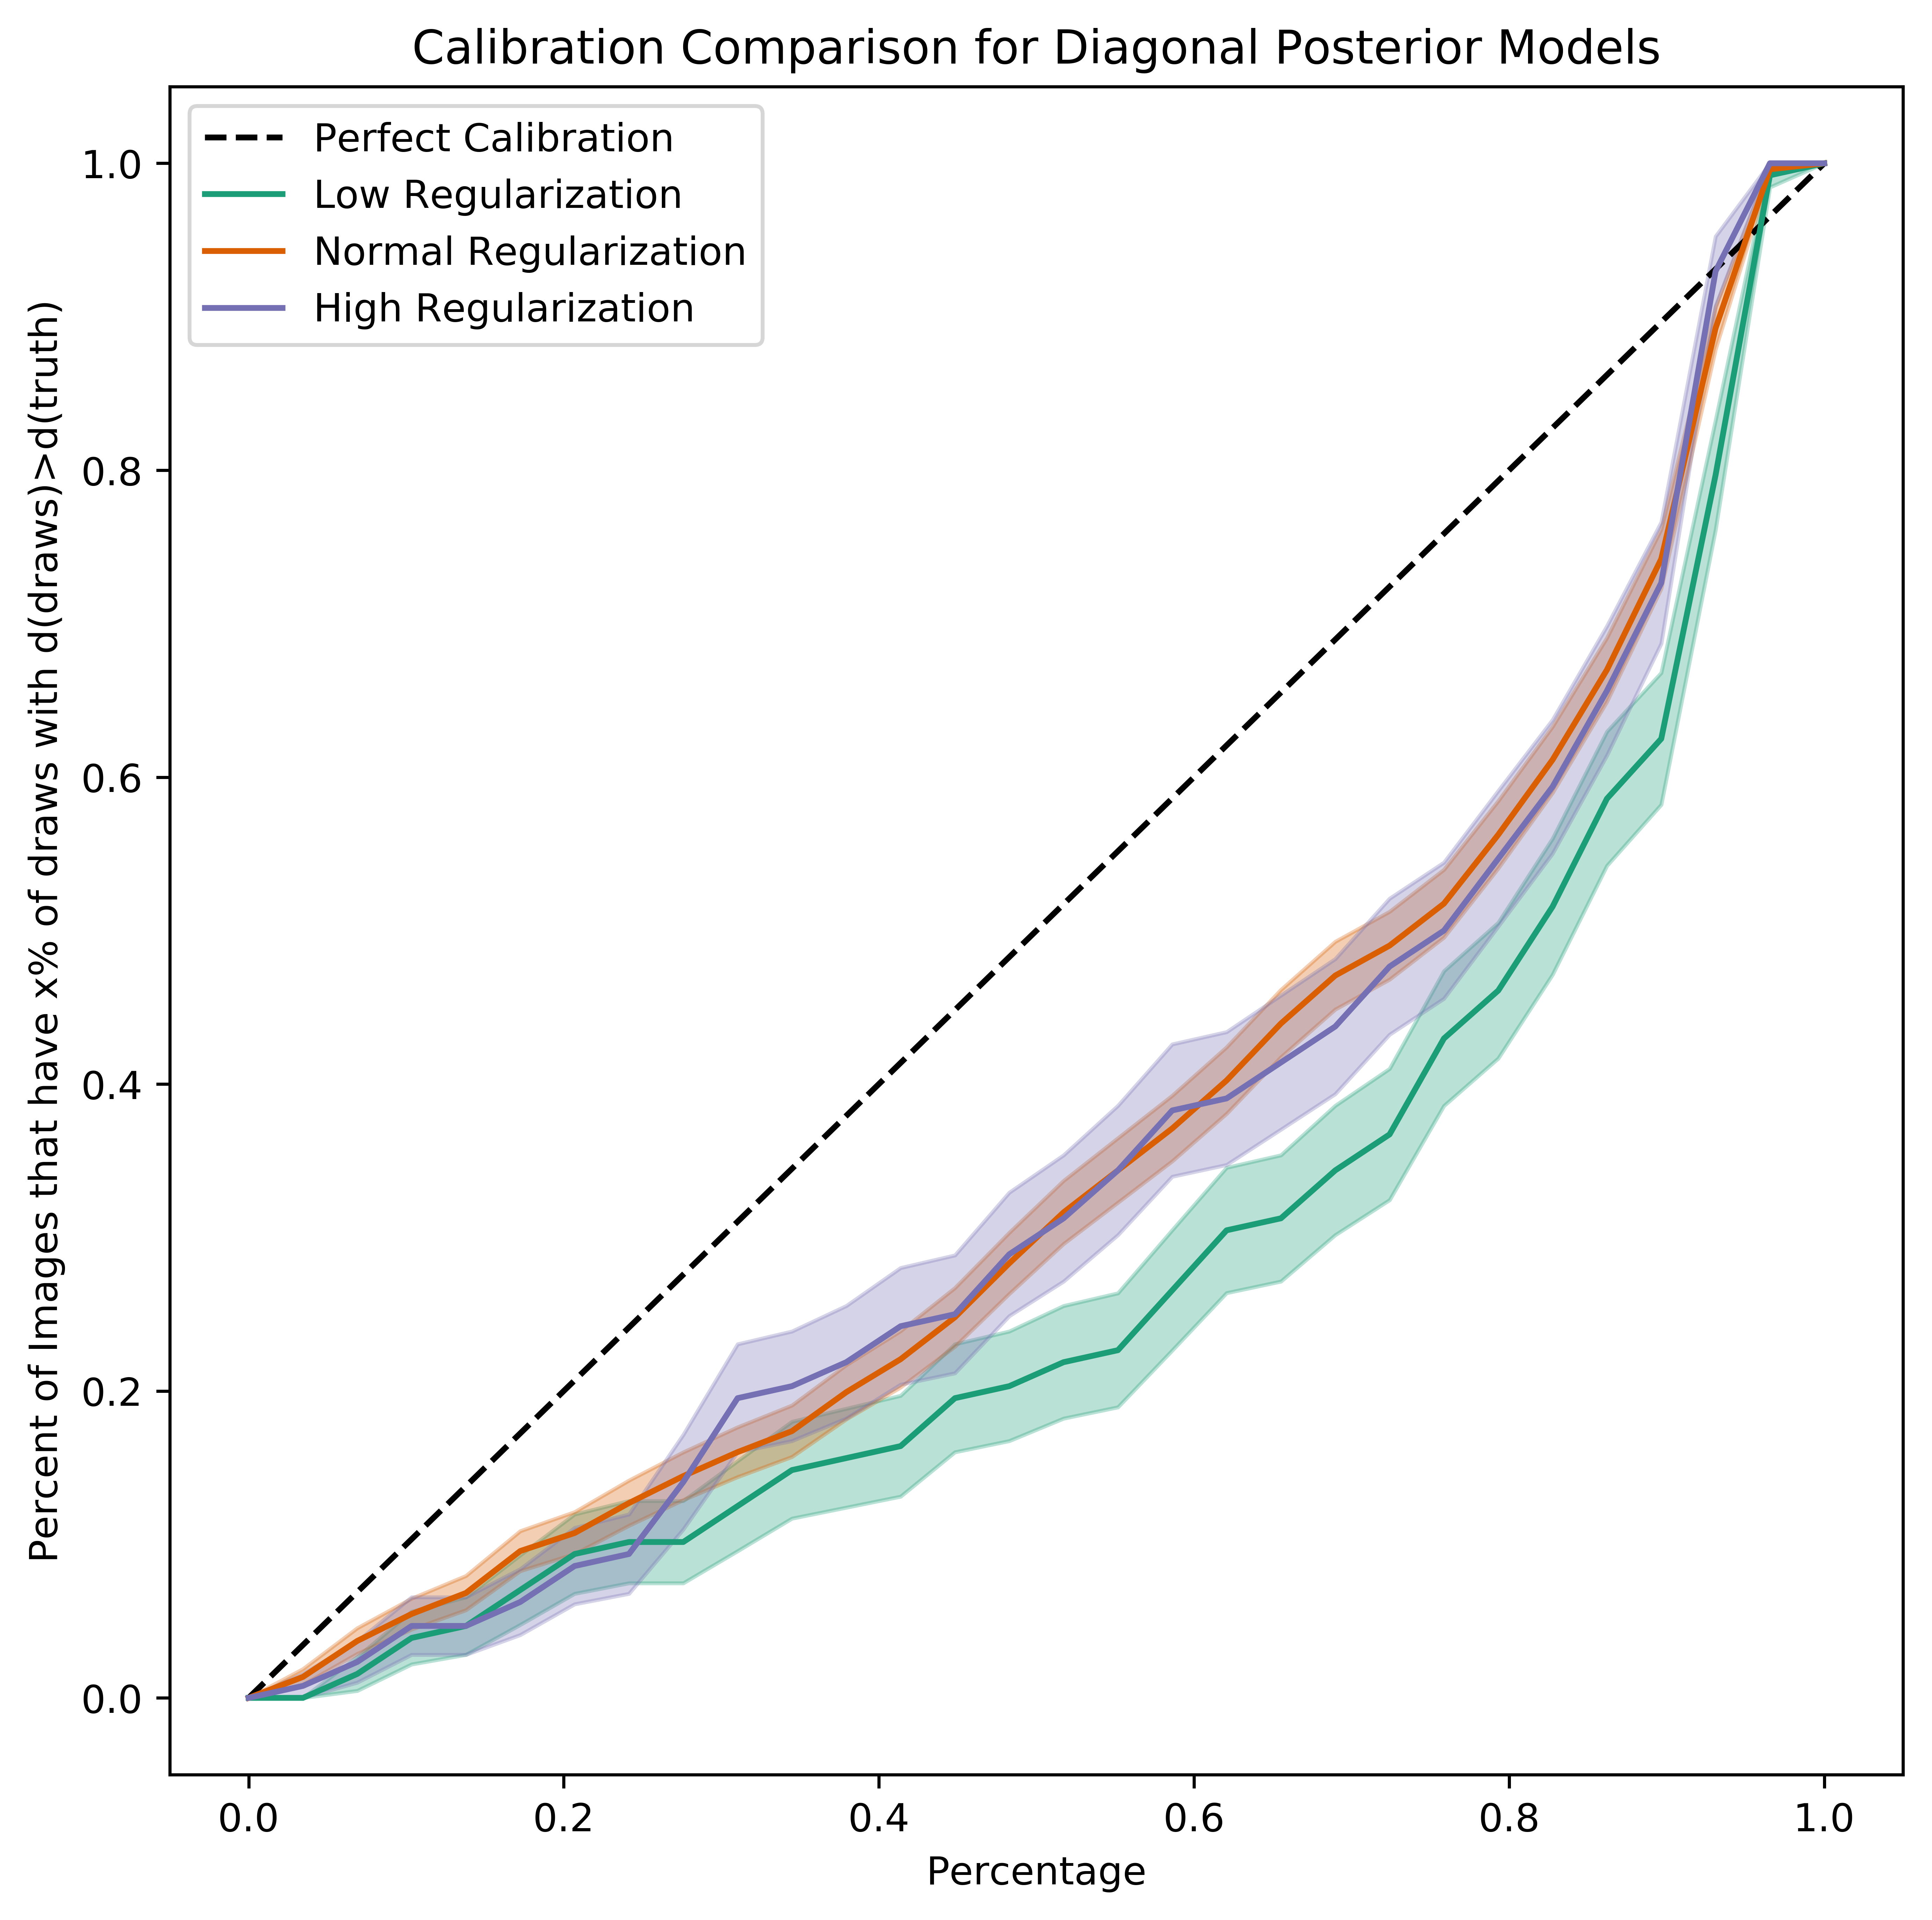

In [70]:
# NN1_LR
config_path = root_path + 'configs/nn1_lr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
bnn_infer.gen_samples(num_samples,save_path_nn1_lr)
color_map = ['#000000','#1b9e77','#d95f02','#7570b3','#e7298a']
n_perc_points = 30
fig = bnn_infer.plot_calibration(color_map=color_map,n_perc_points=n_perc_points,show_plot=False)

# NN1
config_path = root_path + 'configs/nn1.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
bnn_infer.gen_samples(num_samples,save_path_nn1)
fig = bnn_infer.plot_calibration(color_map=color_map[1:],n_perc_points=n_perc_points,figure=fig,show_plot=False)

# NN1_HR
config_path = root_path + 'configs/nn1_hr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
bnn_infer.gen_samples(num_samples,save_path_nn1_hr)
fig = bnn_infer.plot_calibration(color_map=color_map[2:],n_perc_points=n_perc_points,figure=fig,show_plot=True,
                                legend=['Perfect Calibration','Low Regularization','Normal Regularization',
                                       'High Regularization'],
                                 title='Calibration Comparison for Diagonal Posterior Models')

In [ ]:
model.layers

## Full Posterior

In [240]:
model.losses

[<tf.Tensor: id=199110, shape=(), dtype=float32, numpy=-7.613351e-07>,
 <tf.Tensor: id=199119, shape=(), dtype=float32, numpy=5.8597914e-05>,
 <tf.Tensor: id=199136, shape=(), dtype=float32, numpy=-7.282266e-05>,
 <tf.Tensor: id=199145, shape=(), dtype=float32, numpy=0.0020365303>,
 <tf.Tensor: id=199162, shape=(), dtype=float32, numpy=-0.00021937117>,
 <tf.Tensor: id=199171, shape=(), dtype=float32, numpy=0.0037031313>,
 <tf.Tensor: id=199188, shape=(), dtype=float32, numpy=-0.00043918655>,
 <tf.Tensor: id=199197, shape=(), dtype=float32, numpy=0.00476656>,
 <tf.Tensor: id=199214, shape=(), dtype=float32, numpy=-0.00043918655>,
 <tf.Tensor: id=199223, shape=(), dtype=float32, numpy=0.0039552255>,
 <tf.Tensor: id=199240, shape=(), dtype=float32, numpy=-0.004688916>,
 <tf.Tensor: id=199249, shape=(), dtype=float32, numpy=0.05112998>,
 <tf.Tensor: id=199266, shape=(), dtype=float32, numpy=-0.004688916>,
 <tf.Tensor: id=199275, shape=(), dtype=float32, numpy=0.053432498>,
 <tf.Tensor: id=

In [33]:
# First specify the config path
root_path = '/Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/'
config_path = root_path + 'configs/nn2.json'

# Check that the config has what you need
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)

# The InferenceClass will do all the heavy lifting of preparing the model from the configuration file,
# initializing the validation dataset, and providing outputs correctly marginalized over the BNN uncertainties.
bnn_infer = bnn_inference.InferenceClass(cfg)

# Now we just have to ask the InferenceClass to spin up some samples from our BNN. The more samples, the more
# accurate our plots and metrics will be. The right value to use unfortunately requires a bit of trial and error.
# 100 is a good starting point though.
num_samples = 1000
save_path_nn2 = root_path + 'hierarchical_results/nn2_samps/'
bnn_infer.gen_samples(num_samples,save_path_nn2)

Is model built: True
Loaded weights /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/models/nn2.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/hierarchical_results/nn2_samps/


In [326]:
config_path = root_path + 'configs/nn1.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
model = bnn_infer.model

[<tf.Tensor: id=231184, shape=(), dtype=float32, numpy=5.6438085e-07>, <tf.Tensor: id=231197, shape=(), dtype=float32, numpy=2.1786635e-05>, <tf.Tensor: id=231212, shape=(), dtype=float32, numpy=3.6120375e-05>, <tf.Tensor: id=231225, shape=(), dtype=float32, numpy=0.001062054>, <tf.Tensor: id=231240, shape=(), dtype=float32, numpy=0.000108361135>, <tf.Tensor: id=231253, shape=(), dtype=float32, numpy=0.0028447034>, <tf.Tensor: id=231268, shape=(), dtype=float32, numpy=0.00021672227>, <tf.Tensor: id=231281, shape=(), dtype=float32, numpy=0.0042710262>, <tf.Tensor: id=231296, shape=(), dtype=float32, numpy=0.00021672227>, <tf.Tensor: id=231309, shape=(), dtype=float32, numpy=0.0034107966>, <tf.Tensor: id=231324, shape=(), dtype=float32, numpy=0.002311704>, <tf.Tensor: id=231337, shape=(), dtype=float32, numpy=0.04551835>, <tf.Tensor: id=231352, shape=(), dtype=float32, numpy=0.002311704>, <tf.Tensor: id=231365, shape=(), dtype=float32, numpy=0.045510132>, <tf.Tensor: id=231380, shape=(),

In [34]:
bnn_infer.report_stats()

Parameter, Median Abs Error, Median Std
external_shear_g1 0.003119723268872894 0.021711030403869958
external_shear_g2 0.0030928477559320506 0.02437940628523466
lens_mass_center_x 0.0023838893485397233 0.02400617203779199
lens_mass_center_y 0.0022856329731204316 0.023779059962650867
lens_mass_e1 0.005606635907924731 0.04080971474580917
lens_mass_e2 0.0057215190799118545 0.04358480493012028
lens_mass_gamma 0.012402240790963193 0.0642320608900412
lens_mass_theta_E_log 0.002008607897217238 0.02002876355279925


In [382]:
model.layers[1].set_weights((model.layers[1].weights[0].numpy(),model.layers[1].weights[1].numpy(),
                              model.layers[1].weights[2].numpy()-6))
model.layers[1].weights[2]

<tf.Variable 'spatial_concrete_dropout_625/p_logit:0' shape=(1,) dtype=float32, numpy=array([15.319817], dtype=float32)>

In [383]:
model(np.ones((1,64,64,1),dtype=np.float32))

<tf.Tensor: id=242979, shape=(1, 16), dtype=float32, numpy=
array([[ 1.0929697 ,  0.937791  ,  0.12222932, -1.7052413 , -0.8639036 ,
        -0.09012953, -3.1662688 ,  1.9608737 , -1.1105438 , -1.8749152 ,
        -0.56026673, -1.2401628 , -3.1383536 , -2.6783364 , -1.0801072 ,
        -1.1383924 ]], dtype=float32)>

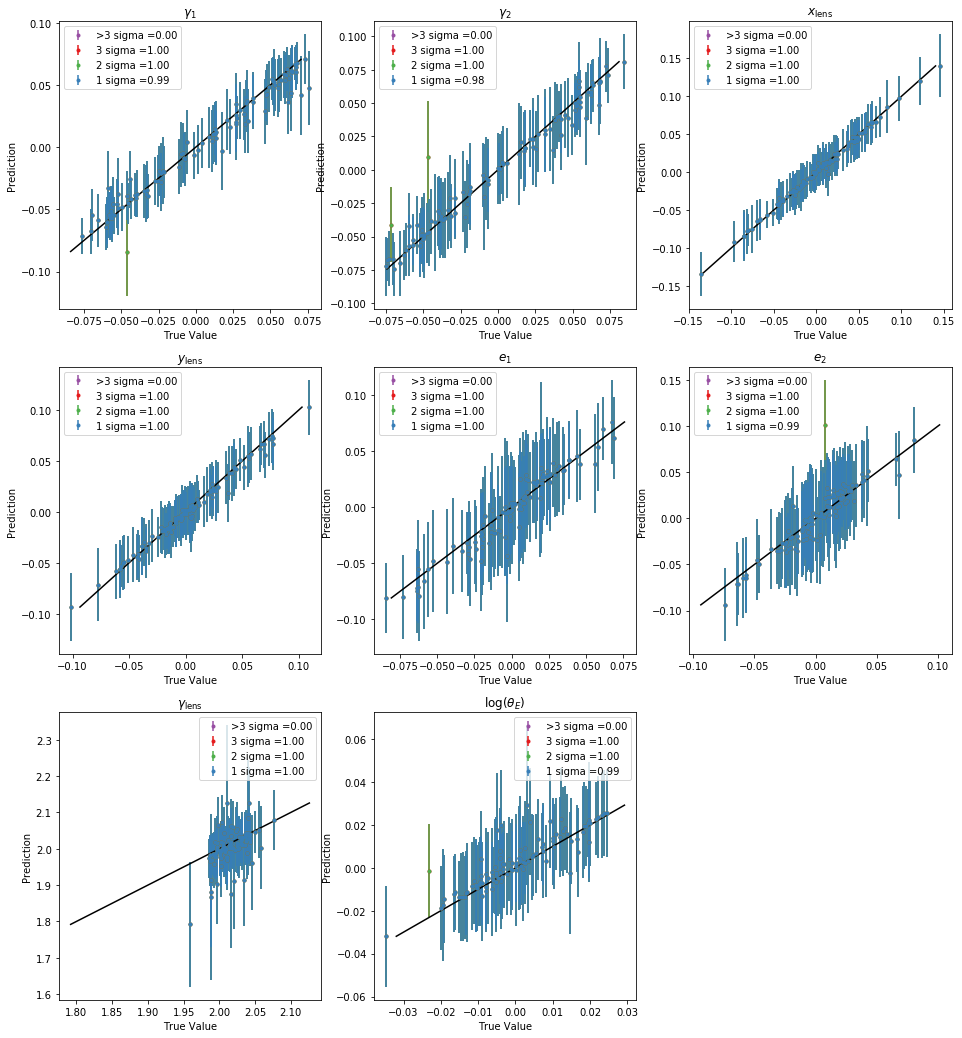

In [37]:
bnn_infer.gen_coverage_plots(num_lenses=num_lenses)

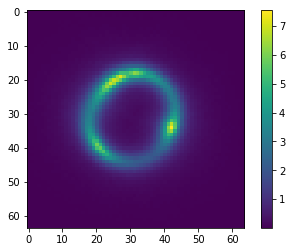

external_shear_g1 -0.024464741
external_shear_g2 -0.06305966
lens_mass_center_x -0.028625775
lens_mass_center_y -0.051288143
lens_mass_e1 0.009173115
lens_mass_e2 -0.01449502
lens_mass_gamma 2.0252705
lens_mass_theta_E_log -0.0010174897


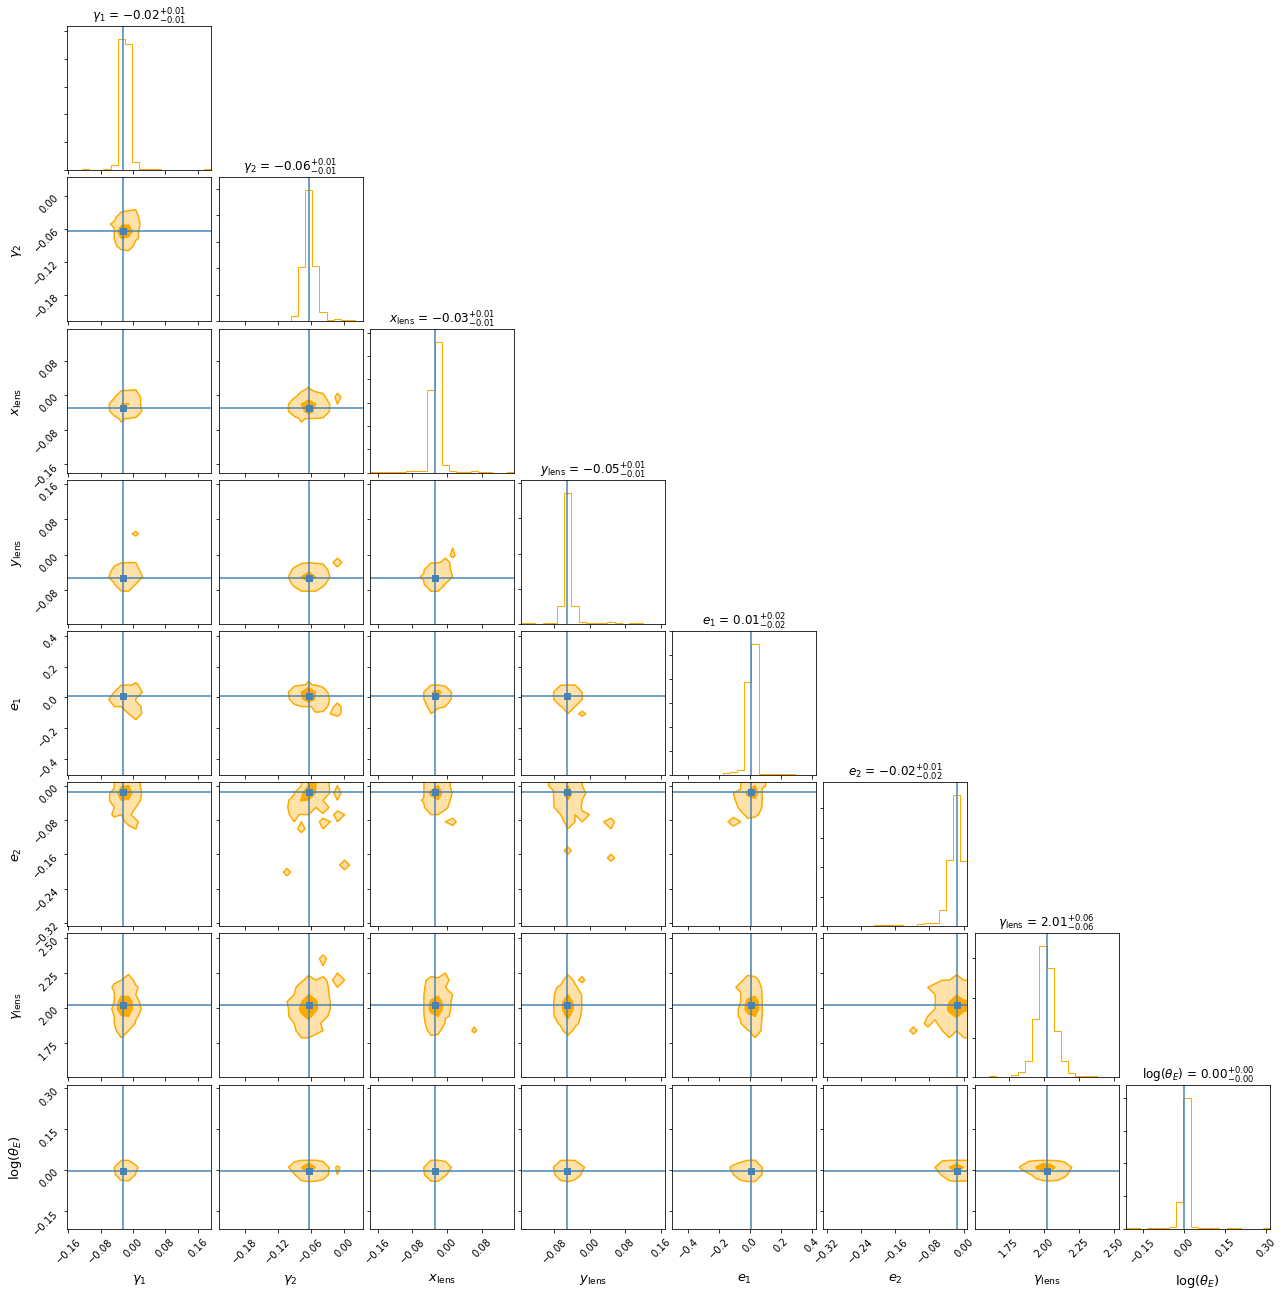

In [38]:
image_index = 20
bnn_infer.plot_posterior_contours(image_index)

6.248739923190948e-06 0.004080086399661589


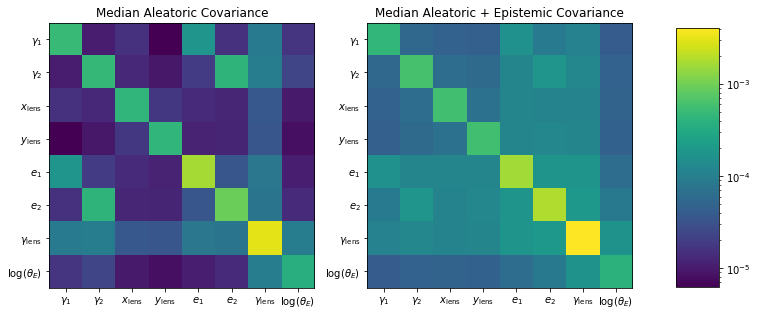

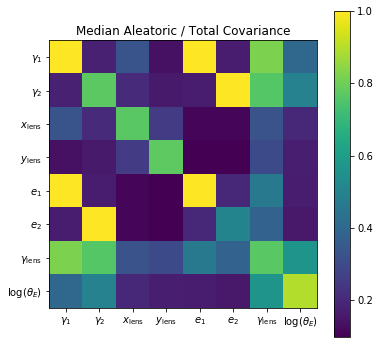

In [39]:
bnn_infer.comp_al_ep_unc()

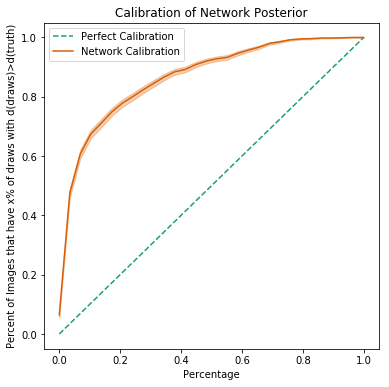

In [40]:
color_map = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e']
n_perc_points = 30
fig = bnn_infer.plot_calibration(color_map=color_map,n_perc_points=n_perc_points,show_plot=False)

## GM Posterior

In [41]:
# First specify the config path
root_path = '/Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/'
config_path = root_path + 'configs/nn3.json'

# Check that the config has what you need
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)

# The InferenceClass will do all the heavy lifting of preparing the model from the configuration file,
# initializing the validation dataset, and providing outputs correctly marginalized over the BNN uncertainties.
bnn_infer = bnn_inference.InferenceClass(cfg)

# Now we just have to ask the InferenceClass to spin up some samples from our BNN. The more samples, the more
# accurate our plots and metrics will be. The right value to use unfortunately requires a bit of trial and error.
# 100 is a good starting point though.
num_samples = 1000
save_path_nn3 = root_path + 'hierarchical_results/nn3_samps/'
bnn_infer.gen_samples(num_samples,save_path_nn3)

Is model built: True
Loaded weights /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/models/nn3.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/hierarchical_results/nn3_samps/


In [42]:
bnn_infer.report_stats()

Parameter, Median Abs Error, Median Std
external_shear_g1 0.0034739725270036157 0.024352203988260848
external_shear_g2 0.0034823268162577324 0.026910163028788552
lens_mass_center_x 0.0026040944197090214 0.025904183364935718
lens_mass_center_y 0.0027301829130211355 0.02575877680407972
lens_mass_e1 0.006738744824959415 0.04572508612918655
lens_mass_e2 0.006908477189579418 0.04671419311048923
lens_mass_gamma 0.013138646358257677 0.06661510534080871
lens_mass_theta_E_log 0.0022005794901438724 0.022216004616424


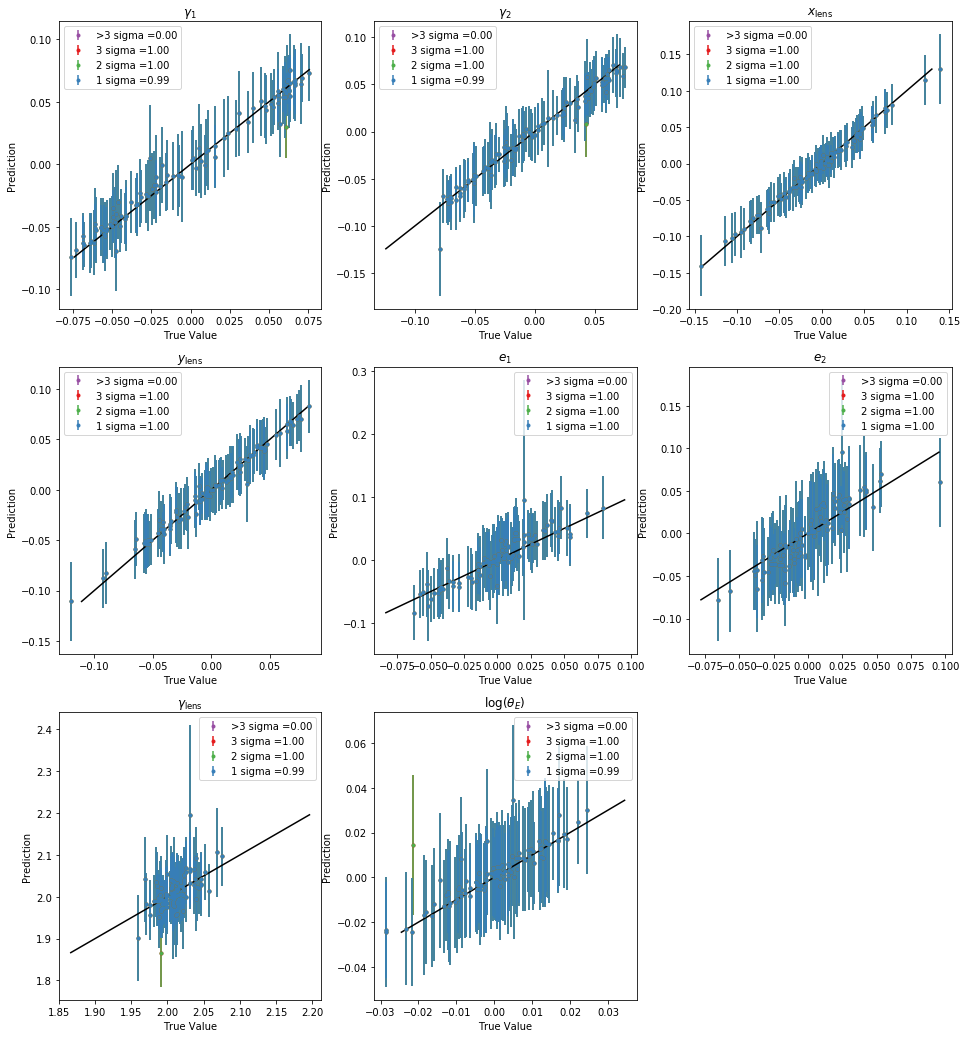

In [43]:
bnn_infer.gen_coverage_plots(num_lenses=num_lenses)

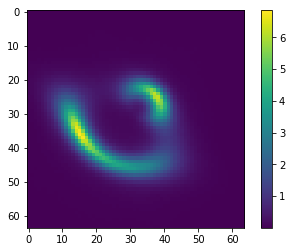

external_shear_g1 0.06270528
external_shear_g2 0.015224149
lens_mass_center_x -0.051460855
lens_mass_center_y -0.090225935
lens_mass_e1 0.009807641
lens_mass_e2 -0.010379399
lens_mass_gamma 1.9973375
lens_mass_theta_E_log 0.0009454201


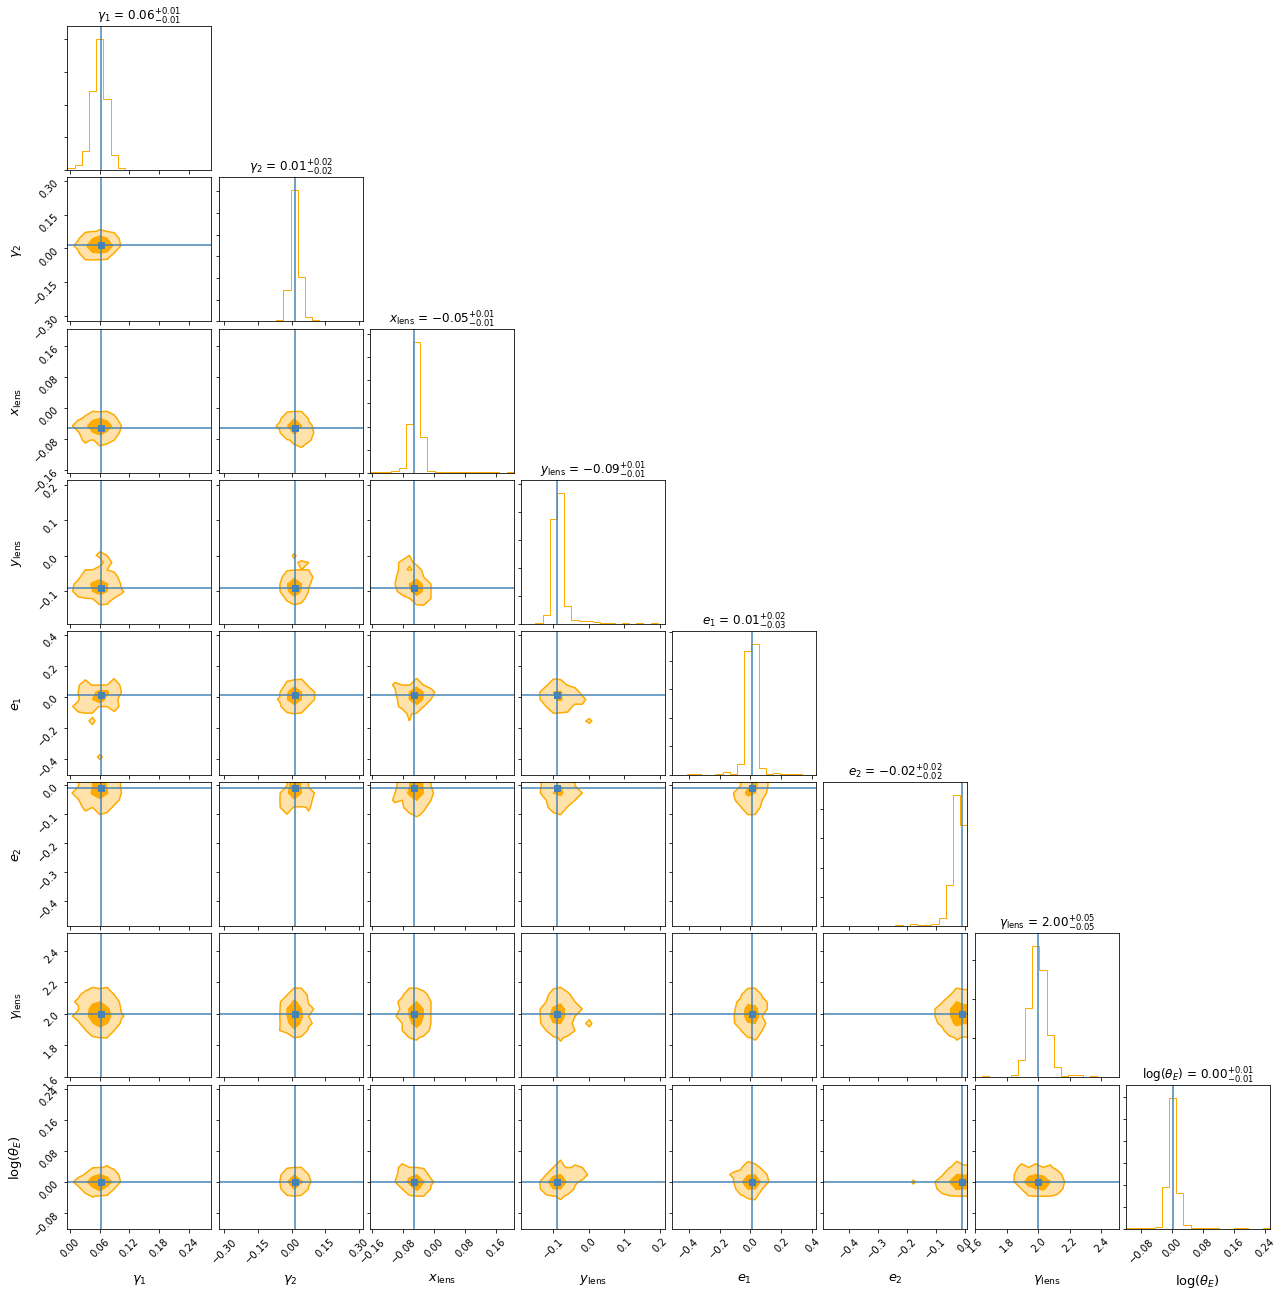

In [44]:
image_index = 20
bnn_infer.plot_posterior_contours(image_index)

6.326279863293832e-06 0.004500689974419618


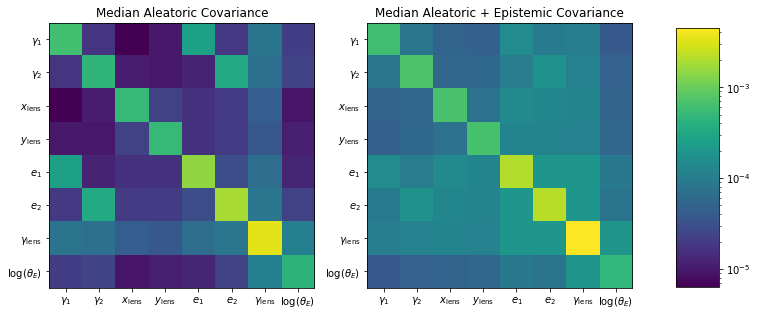

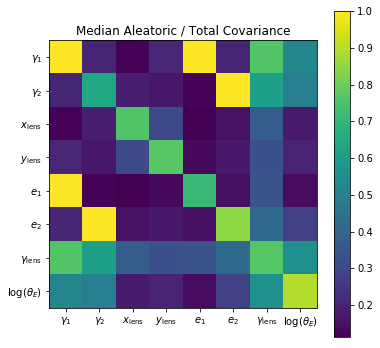

In [45]:
bnn_infer.comp_al_ep_unc()

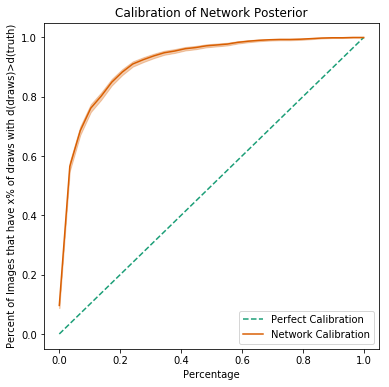

In [46]:
color_map = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e']
n_perc_points = 30
fig = bnn_infer.plot_calibration(color_map=color_map,n_perc_points=n_perc_points,show_plot=False)

## Combined Plot

Is model built: True
Loaded weights /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/models/nn1.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/hierarchical_results/nn1_samps/
Is model built: True
Loaded weights /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/models/nn2.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/hierarchical_results/nn2_samps/
Is model built: True
Loaded weights /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/models/nn3.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/hierarchical_results/nn3_samps/


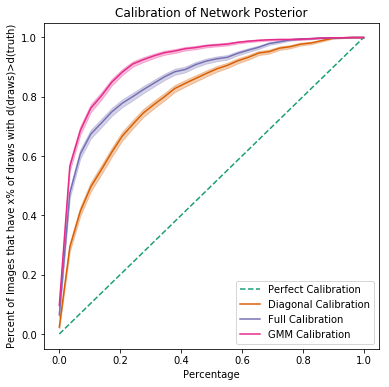

In [47]:
# First specify the config path
config_path = root_path + 'configs/nn1.json'

# Check that the config has what you need
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)

# The InferenceClass will do all the heavy lifting of preparing the model from the configuration file,
# initializing the validation dataset, and providing outputs correctly marginalized over the BNN uncertainties.
bnn_infer = bnn_inference.InferenceClass(cfg)

# Now we just have to ask the InferenceClass to spin up some samples from our BNN. The more samples, the more
# accurate our plots and metrics will be. The right value to use unfortunately requires a bit of trial and error.
# 100 is a good starting point though.
num_samples = 1000
bnn_infer.gen_samples(num_samples,save_path_nn1)

color_map = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e']
n_perc_points = 30
fig = bnn_infer.plot_calibration(color_map=color_map,n_perc_points=n_perc_points,show_plot=False)

# NN2
config_path = root_path + 'configs/nn2.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
bnn_infer.gen_samples(num_samples,save_path_nn2)
fig = bnn_infer.plot_calibration(color_map=color_map[1:],n_perc_points=n_perc_points,figure=fig,show_plot=False)

# NN3
config_path = root_path + 'configs/nn3.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
bnn_infer.gen_samples(num_samples,save_path_nn3)
fig = bnn_infer.plot_calibration(color_map=color_map[2:],n_perc_points=n_perc_points,figure=fig,show_plot=True,
                                legend=['Perfect Calibration','Diagonal Calibration','Full Calibration',
                                       'GMM Calibration'])